# Feature Matching

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [6]:
reeses = cv2.imread('DATA/reeses_puffs.png',0)     

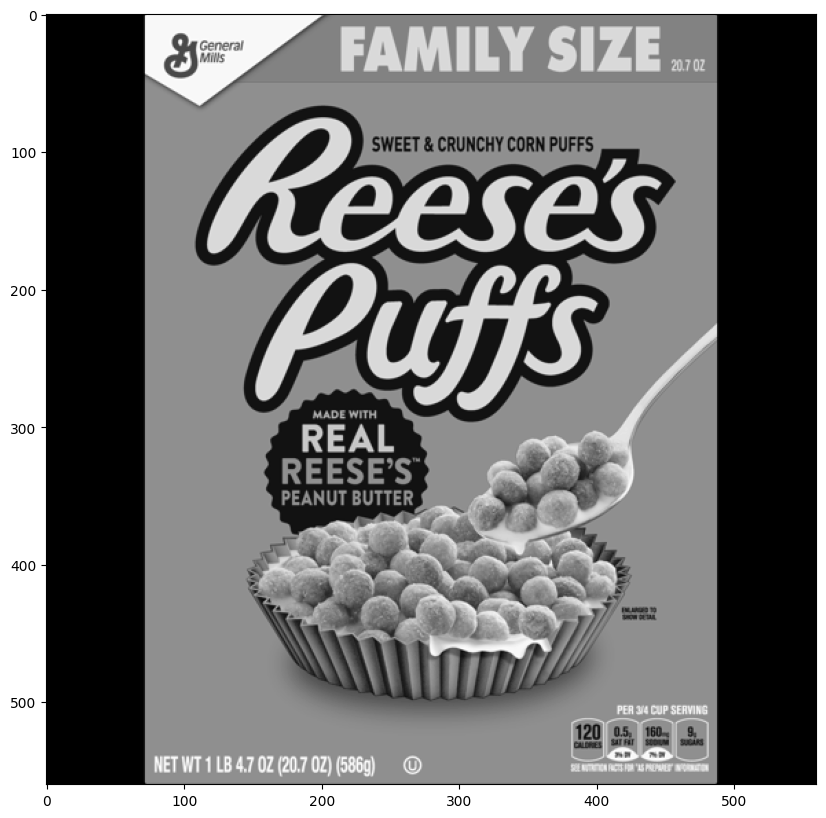

In [8]:
display(reeses)

In [13]:
cereals = cv2.imread('DATA/many_cereals.jpg', 0)

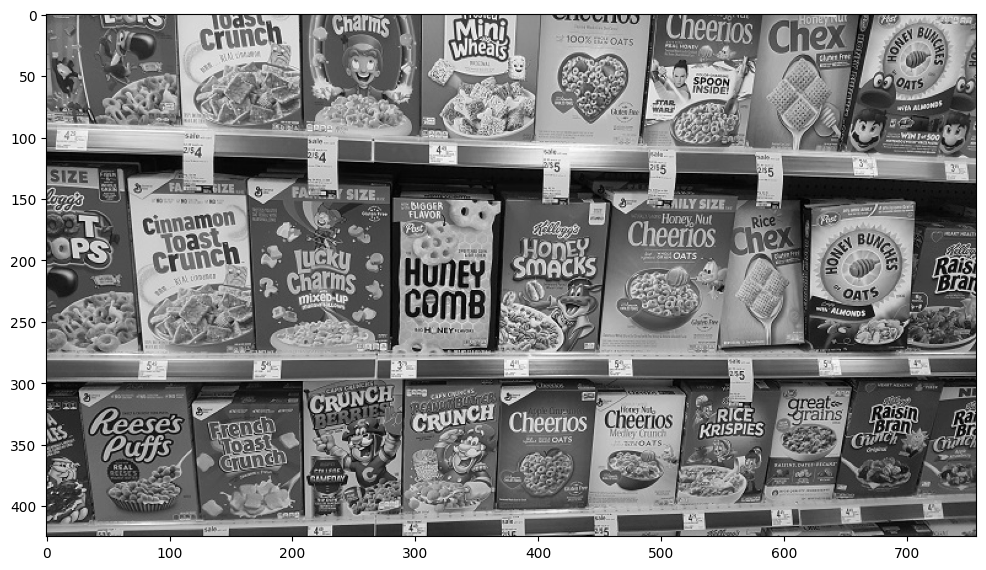

In [14]:
display(cereals)

--------
# Brute Force Detection with ORB Descriptors

In [18]:
orb = cv2.ORB_create()

In [30]:
kp1, des1 = orb.detectAndCompute(reeses,None)
kp2, des2 = orb.detectAndCompute(cereals,None)

In [31]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [32]:
matches = bf.match(des1, des2)

In [33]:
single_match = matches[0]

In [34]:
single_match.distance

56.0

In [35]:
len(matches)

139

In [36]:
matches = sorted(matches, key=lambda x: x.distance)

In [37]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

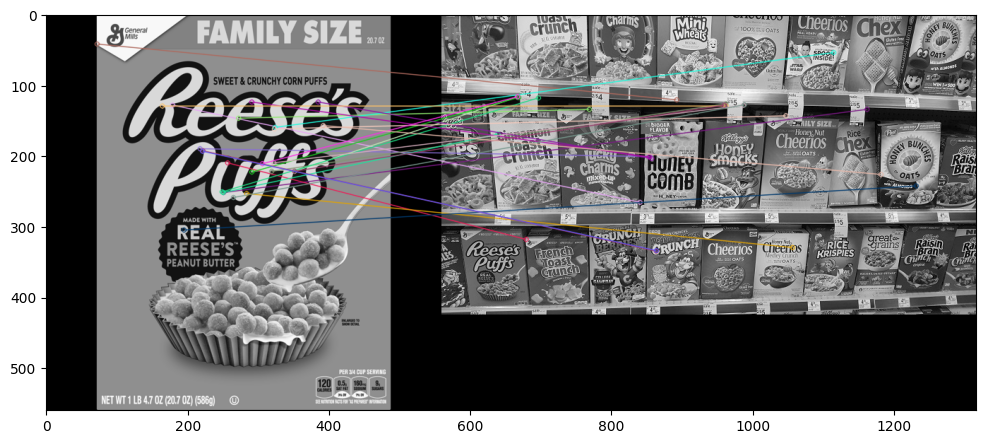

In [38]:
display(reeses_matches)

# Brute-Force Matching with SIFT Descriptors and Ratio Test

In [41]:
sift = cv2.SIFT_create()

In [42]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [43]:
bf = cv2.BFMatcher()

In [44]:
des1

array([[19.,  0.,  0., ...,  1.,  0.,  0.],
       [15.,  0.,  0., ..., 11.,  1.,  0.],
       [21.,  0.,  0., ...,  0., 10., 13.],
       ...,
       [61.,  6.,  0., ...,  0.,  0.,  0.],
       [27.,  0.,  0., ...,  0.,  0.,  0.],
       [48.,  0.,  0., ...,  0.,  1.,  0.]], dtype=float32)

In [45]:
matches = bf.knnMatch(des1, des2, k=2)

In [47]:
good = []

# less distance = Better match
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [48]:
good

[[< cv2.DMatch 000001E131878230>],
 [< cv2.DMatch 000001E131879450>],
 [< cv2.DMatch 000001E131879A10>],
 [< cv2.DMatch 000001E131879A50>],
 [< cv2.DMatch 000001E131879C50>],
 [< cv2.DMatch 000001E13187A250>],
 [< cv2.DMatch 000001E13187A550>],
 [< cv2.DMatch 000001E13187A6D0>],
 [< cv2.DMatch 000001E13187AA50>],
 [< cv2.DMatch 000001E13187AC90>],
 [< cv2.DMatch 000001E13187B050>],
 [< cv2.DMatch 000001E13187B150>],
 [< cv2.DMatch 000001E1318D4410>],
 [< cv2.DMatch 000001E1318D4450>],
 [< cv2.DMatch 000001E1318D4550>],
 [< cv2.DMatch 000001E1318D52D0>],
 [< cv2.DMatch 000001E1318D5C50>],
 [< cv2.DMatch 000001E1318D5D10>],
 [< cv2.DMatch 000001E1318D5DD0>],
 [< cv2.DMatch 000001E1318D6650>],
 [< cv2.DMatch 000001E1318D6790>],
 [< cv2.DMatch 000001E1318D7890>],
 [< cv2.DMatch 000001E1318D79D0>],
 [< cv2.DMatch 000001E1318D7A10>],
 [< cv2.DMatch 000001E1318D7BD0>],
 [< cv2.DMatch 000001E1318D7C10>],
 [< cv2.DMatch 000001E1318D8E50>],
 [< cv2.DMatch 000001E1318D8FD0>],
 [< cv2.DMatch 00000

In [49]:
len(good)

79

In [50]:
len(matches)

1501

In [51]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

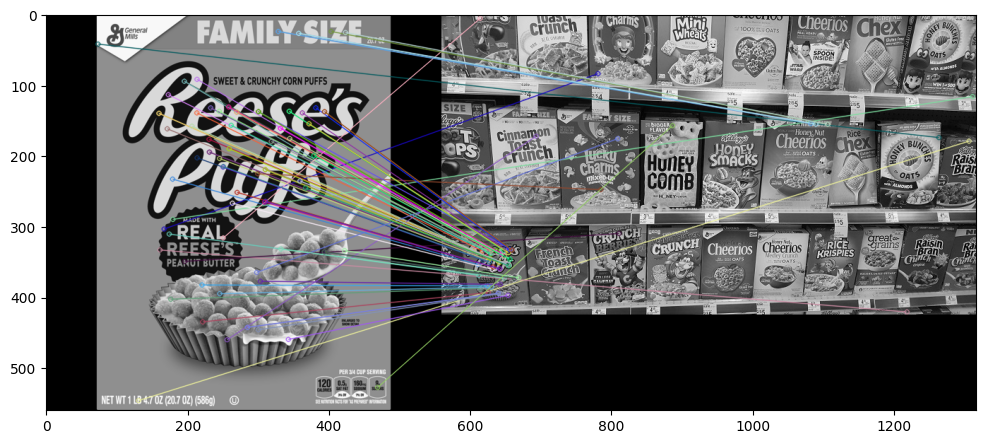

In [52]:
display(sift_matches)

# FLANN based Matcher

In [53]:
sift = cv2.SIFT_create()

In [54]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [55]:
# FLANN
FLANN_INDEX_KDTEE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTEE, trees=5)
search_params = dict(checks=50) 

In [56]:
flann = cv2.FlannBasedMatcher(index_params, search_params) 

In [59]:
matches = flann.knnMatch(des1,des2,k=2)

In [60]:
good =[]

for match1, match in matches:
    if match1.distance < 0.7 * match2.distance:
        good.append([match1])

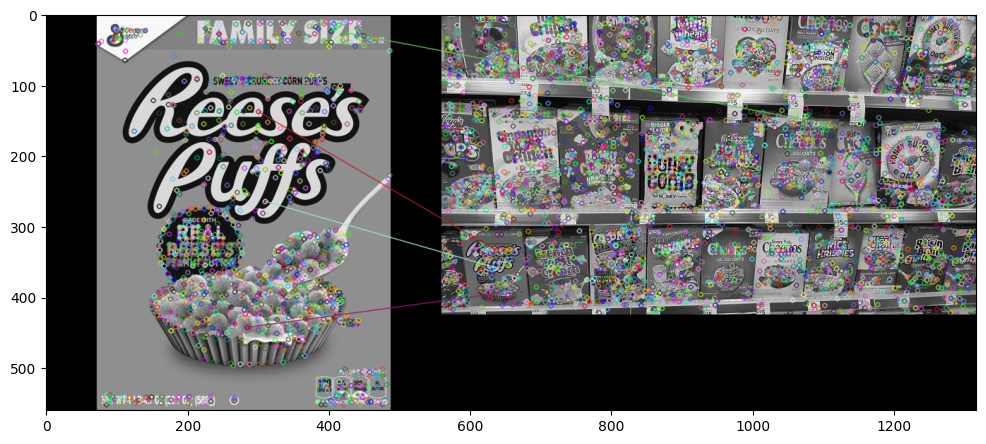

In [62]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=0)
display(flann_matches)

In [64]:
sift = cv2.SIFT_create()

In [65]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [66]:
# FLANN
FLANN_INDEX_KDTEE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTEE, trees=5)
search_params = dict(checks=50) 

In [67]:
flann = cv2.FlannBasedMatcher(index_params, search_params) 

In [68]:
matches = flann.knnMatch(des1,des2,k=2)

In [69]:
matchesMask = [[0,0] for i in range(len(matches))]

In [70]:
matchesMask

[[0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 

In [71]:
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]

In [72]:
draw_params = dict(matchColor =(0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask=matchesMask,
                   flags=0)

In [73]:
matches

((< cv2.DMatch 000001E1340FE510>, < cv2.DMatch 000001E131907E70>),
 (< cv2.DMatch 000001E131907C10>, < cv2.DMatch 000001E131907BD0>),
 (< cv2.DMatch 000001E131906F50>, < cv2.DMatch 000001E131906B90>),
 (< cv2.DMatch 000001E131907B10>, < cv2.DMatch 000001E131906BF0>),
 (< cv2.DMatch 000001E131907750>, < cv2.DMatch 000001E131907B90>),
 (< cv2.DMatch 000001E131906C10>, < cv2.DMatch 000001E131907EF0>),
 (< cv2.DMatch 000001E131906D10>, < cv2.DMatch 000001E131906EF0>),
 (< cv2.DMatch 000001E131906C50>, < cv2.DMatch 000001E131906D70>),
 (< cv2.DMatch 000001E131907EB0>, < cv2.DMatch 000001E131907430>),
 (< cv2.DMatch 000001E131907D90>, < cv2.DMatch 000001E131907510>),
 (< cv2.DMatch 000001E131907390>, < cv2.DMatch 000001E131906EB0>),
 (< cv2.DMatch 000001E1319075D0>, < cv2.DMatch 000001E131907D10>),
 (< cv2.DMatch 000001E131907530>, < cv2.DMatch 000001E131906E10>),
 (< cv2.DMatch 000001E131906DF0>, < cv2.DMatch 000001E131906E70>),
 (< cv2.DMatch 000001E131906DD0>, < cv2.DMatch 000001E131907DD

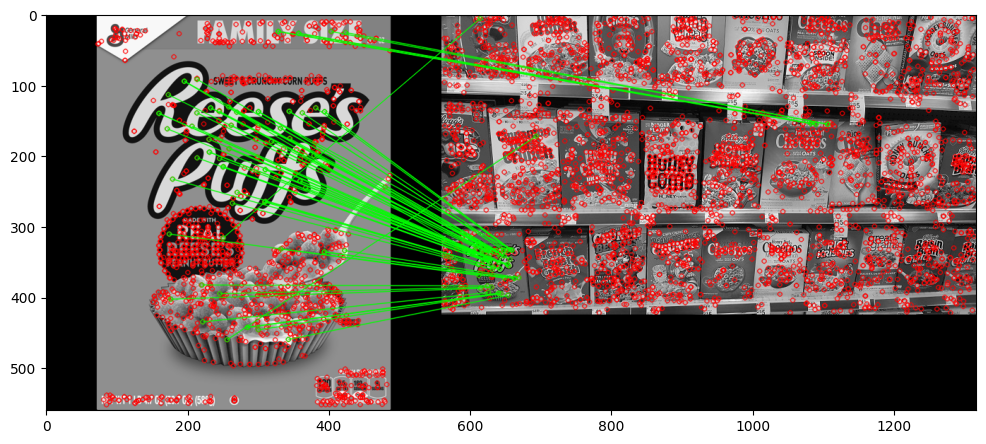

In [74]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)
display(flann_matches)